In [189]:
# !pip install eli5 -q

In [190]:
import eli5
import warnings
warnings.filterwarnings('ignore')

In [301]:
## Importing libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, RobustScaler 
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import HistGradientBoostingRegressor, GradientBoostingRegressor

import xgboost as xgb
import catboost as cb
from lightgbm import LGBMRegressor

### Reading Dataframes

In [438]:
train = pd.read_csv("Train.csv")

test = pd.read_csv("Test.csv")
sub = pd.read_csv("SampleSubmission (1).csv")
vard = pd.read_csv("VariableDescription.csv")

## Exploratory Data Analysis

In [193]:
df_train = train.copy()
df_test = test.copy()

In [194]:
pd.set_option("display.max_colwidth", 100)
vard.iloc[60:100,:]

,Variable Name,Variable Label,Answer Label
60,grade_r,There are at least ${count_register_year_grader} children who are old enough (born before 2018) ...,NaN
61,count_register_race_african,African/Black,Open ended
62,count_register_race_coloured,Coloured,Open ended
63,count_register_race_indian,Indian/Asian,Open ended
64,count_register_race_white,White,Open ended
65,count_register_race_other,Other,Open ended
66,count_register_race,Count Register Race,Open ended
67,count_staff_qual_skills,Accredited skills programme,Open ended
68,count_staff_qual_nqf4_5,NQF Level 4-5: ECD,Open ended
69,count_staff_qual_nqf6_9,NQF Level 6-9: ECD,Open ended


In [195]:
df_train.head()

,child_id,data_year,child_date,child_age,child_enrolment_date,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,...,obs_cooking_5,obs_cooking_6,obs_heating_1,obs_heating_2,obs_heating_3,obs_heating_4,obs_heating_5,obs_heating_6,obs_heating_7,target
0,ID_SYSJ2FM0D,2022.0,2022-02-03,59.000000,NaN,NaN,NaN,NaN,NaN,Sometimes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.500000
1,ID_J5BTFOZR3,2019.0,NaN,60.163933,NaN,NaN,NaN,1st year in the programme,103.000000,Sometimes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.869999
2,ID_R00SN7AUD,2022.0,2022-03-11,69.000000,NaN,NaN,NaN,NaN,108.400002,Often,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.520000
3,ID_BSSK60PAZ,2021.0,2021-10-13,53.000000,2020-01-15,20.0,No,1st year in the programme,98.099998,Almost always,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.599998
4,ID_IZTY6TC4D,2021.0,2021-10-13,57.000000,2021-10-13,0.0,NaN,2nd year in programme,114.000000,Almost always,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,76.599998


In [196]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8585 entries, 0 to 8584
Columns: 679 entries, child_id to target
dtypes: float64(160), object(519)
memory usage: 44.5+ MB


In [197]:
df_train.describe()

,data_year,child_age,child_months_enrolment,child_height,child_observe_total,child_zha,child_attendance,ward_best,id_enumerator,id_facility,...,obs_cooking_5,obs_cooking_6,obs_heating_1,obs_heating_2,obs_heating_3,obs_heating_4,obs_heating_5,obs_heating_6,obs_heating_7,target
count,8585.000000,8585.000000,2621.000000,6969.000000,7883.000000,6923.000000,1320.00000,5572.000000,7162.000000,8573.000000,...,2256.000000,2256.000000,2261.000000,2261.000000,2261.000000,2261.000000,2261.000000,2261.000000,2261.000000,8585.000000
mean,2020.983692,58.116873,20.476917,106.949312,7.381454,-0.367788,4.70303,25.875269,7124.970399,1213.428438,...,0.074468,0.019947,0.194162,0.643078,0.002211,0.072092,0.050420,0.026095,0.011942,48.693783
std,0.920267,5.318927,14.096259,6.430768,3.256987,1.098113,0.76978,28.043010,8706.202270,684.145046,...,0.262589,0.139848,0.395642,0.479197,0.046984,0.258697,0.218859,0.159452,0.108647,15.160414
min,2019.000000,49.475410,0.000000,64.199997,0.000000,-5.868164,1.00000,1.000000,9.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.370000
25%,2021.000000,54.000000,8.000000,103.000000,5.000000,-1.064535,5.00000,7.000000,502.000000,638.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.599998
50%,2021.000000,57.000000,20.000000,106.599998,8.000000,-0.385991,5.00000,16.000000,2680.000000,1198.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.310001
75%,2022.000000,62.032787,33.000000,110.500000,10.000000,0.341011,5.00000,31.000000,20022.000000,1809.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.310001
max,2022.000000,69.683777,57.000000,159.000000,12.000000,5.540900,7.00000,130.000000,20090.000000,2361.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,96.809998


In [198]:
# Converting year and months to integer
df_train["data_year"] = df_train["data_year"].astype('Int64')
df_train["child_months_enrolment"] = df_train["child_months_enrolment"].astype("Int64")

df_test["data_year"] = df_test["data_year"].astype('Int64')
df_test["child_months_enrolment"] = df_test["child_months_enrolment"].astype("Int64")

In [199]:
# Getting the list of datatime columns
dt_cols_train = df_train.columns[df_train.columns.str.contains("date")]\
    .to_list()\
    + ["child_dob"]

dt_cols_test = df_test.columns[df_test.columns.str.contains("date")]\
    .to_list()\
    + ["child_dob"]

# In the dataframe "child_dob" is also a datatime column
dt_cols_train

['child_date',
 'child_enrolment_date',
 'pqa_date',
 'pra_date',
 'pri_date',
 'obs_date',
 'child_dob']

In [200]:
# Converting columns with datetime values to datetime dtype
df_train[dt_cols_train] = df_train[dt_cols_train].apply(lambda x: pd.to_datetime(x, yearfirst=True))
df_test[dt_cols_test] = df_test[dt_cols_test].apply(lambda x: pd.to_datetime(x, yearfirst=True))

### Data Visualizations

Text(0, 0.5, 'Count')

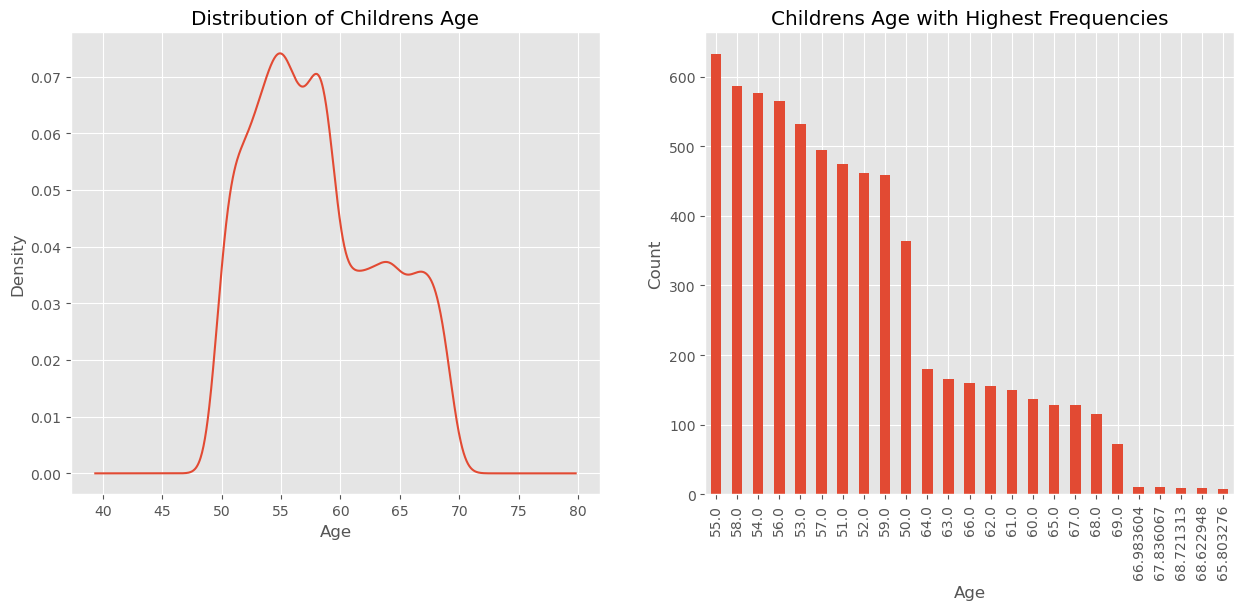

In [201]:
# Plotting the age features
# ax = df_train["child_age"].value_counts()\
#     .head(25)\
#     .plot(kind="bar", title="Childrens Age with Highest Frequencies")
# ax.set_xlabel("Age")
# ax.set_ylabel("Frequency")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

df_train["child_age"]\
    .plot(kind="kde", title="Distribution of Childrens Age", ax=ax1)
# sns.histplot(df_train["child_age"],kde=True, ax=ax1)
ax1.set_xlabel("Age")

df_train["child_age"].value_counts()\
    .head(25)\
    .plot(kind="bar", title="Childrens Age with Highest Frequencies", ax=ax2)
ax2.set_xlabel("Age")
ax2.set_ylabel("Count")

Text(0, 0.5, 'Count')

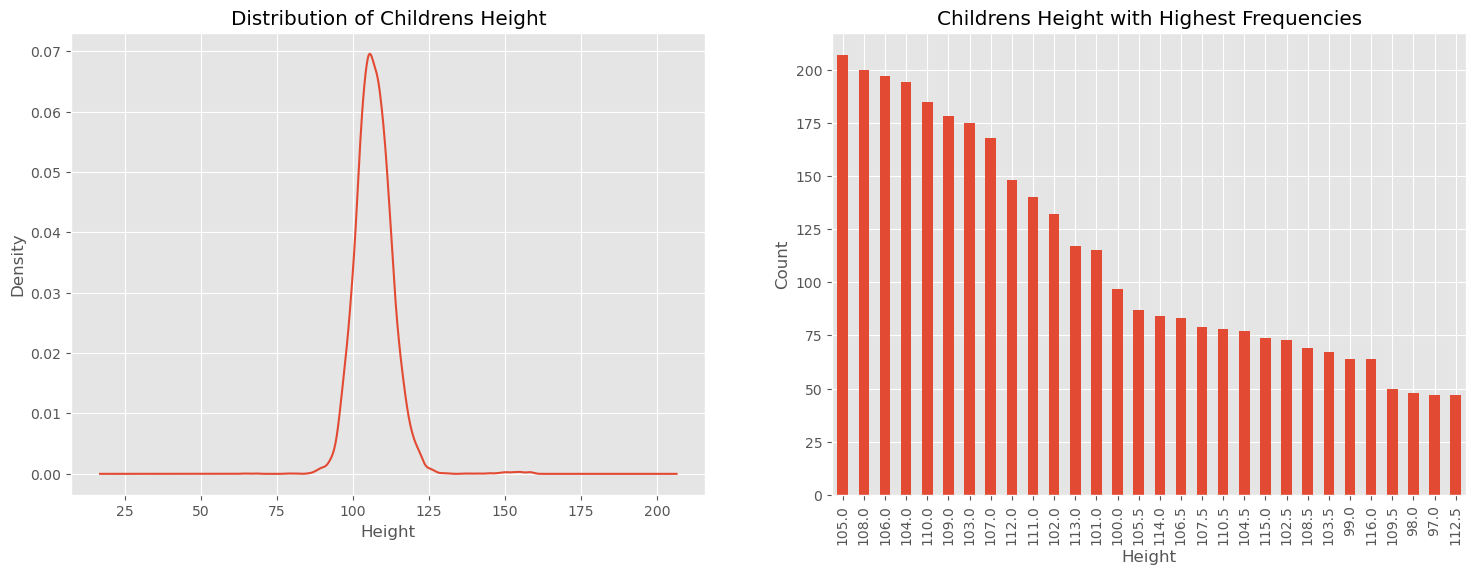

In [202]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

df_train["child_height"]\
    .plot(kind="kde", title="Distribution of Childrens Height", ax=ax1)
# sns.histplot(df_train["child_height"], kde=True, ax=ax1)
ax1.set_xlabel("Height")

df_train["child_height"].value_counts()\
    .head(30)\
    .plot(kind="bar", title="Childrens Height with Highest Frequencies", ax=ax2)
ax2.set_xlabel("Height")
ax2.set_ylabel("Count")

Text(0, 0.5, 'Count')

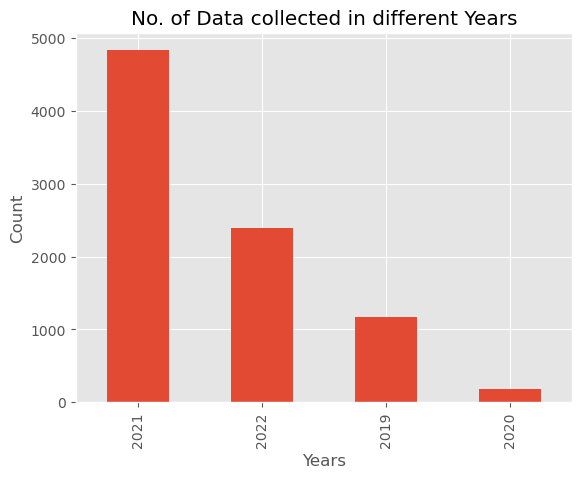

In [203]:
# Plotting the dates with highest no of data
ax = df_train['data_year'].value_counts() \
    .plot(kind="bar", title="No. of Data collected in different Years")
ax.set_xlabel("Years")
ax.set_ylabel("Count")

Text(0.5, 0, 'target')

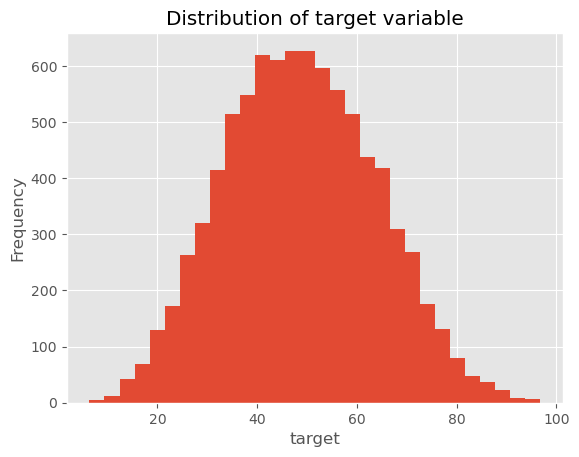

In [204]:
ax = df_train['target']\
    .plot(kind="hist",
                bins = 30,
                title="Distribution of target variable")

ax.set_xlabel("target")

## target variable normally distributed

### Handling Missing Values

In [205]:
# Getting columns with no missing values
(df_train.isnull().sum() >= 8000).value_counts()

False    628
True      51
dtype: int64

In [206]:
# Columns with highest numbers of missing values
# There are some columns with more than 8000 missing values
df_train.isna().sum().sort_values(ascending=False).head(20).index

Index(['other_practitioner', 'pri_clinic_travelother', 'pri_locationother',
       'pri_founderother', 'pra_class_space_small', 'pra_educationother',
       'obs_materialsother', 'positionotherreason', 'positionother',
       'pri_name_network_other', 'pri_covid_awareness_other',
       'pri_funding_salaryother', 'hle_ecd_other', 'pra_class_size_large',
       'obs_handwashingother', 'pri_covid_precautions_other',
       'pri_food_donorother', 'pri_qualificationother', 'pra_ncf_trainerother',
       'pra_plan_5yrsother'],
      dtype='object')

In [207]:
# Replacing string values of years with integer
df_train["child_years_in_programme"].replace({"1st year in the programme": 1,
                                             "2nd year in programme": 2,
                                             "3rd year in programme": 3,
                                             "Do Not Know": 0},
                                            inplace = True)

df_test["child_years_in_programme"].replace({"1st year in the programme": 1,
                                             "2nd year in programme": 2,
                                             "3rd year in programme": 3,
                                             "Do Not Know": 0},
                                            inplace = True)

In [208]:
# id columns
id_columns_train = df_train.columns[df_train.columns.str.startswith("id_")]
id_columns_test = df_test.columns[df_test.columns.str.startswith("id_")]

id_columns_train

Index(['id_mn_best', 'id_dc_best', 'id_enumerator', 'id_facility', 'id_ward',
       'id_prov', 'id_team', 'id_facility_n', 'id_ward_n', 'id_mn_n',
       'id_dc_n', 'id_prov_n'],
      dtype='object')

In [209]:
# Dropping id columns
df_train.drop(columns=id_columns_train, inplace=True)
df_test.drop(columns=id_columns_test, inplace=True)

## Feature Engineering

In [210]:
# Extracting "year", "months" and "days" values from datatetime columns
# df_train["child_date_year"] = df_train["child_date"].dt.year.astype('Int64')
# df_train["child_date_months"] = df_train["child_date"].dt.month.astype('Int64')
# df_train["child_date_days"] = df_train["child_date"].dt.day.astype('Int64')

# df_train["child_enrollmend_year"] = df_train["child_enrolment_date"].dt.year.astype("Int64")
# df_train["child_enrollmend_month"] = df_train["child_enrolment_date"].dt.month.astype("Int64")
# df_train["child_enrollmend_day"] = df_train["child_enrolment_date"].dt.day.astype("Int64")

# df_train["child_birth_year"] = df_train['child_dob'].dt.year.astype("Int64")
# df_train["child_birth_month"] = df_train['child_dob'].dt.month.astype("Int64")
# df_train["child_birth_day"] = df_train['child_dob'].dt.day.astype("Int64")


In [211]:
# Extracting "year", "months" and "days" values from datatetime columns
def extract_features(dataframe, datetimeColumn):
    year = dataframe[datetimeColumn].dt.year.astype("Int64")
    month = dataframe[datetimeColumn].dt.month.astype("Int64")
    day = dataframe[datetimeColumn].dt.day.astype("Int64") 
        
    return year, month, day

In [212]:
df_train["child_date_year"], df_train["child_date_months"], df_train["child_date_days"] = extract_features(df_train, "child_date")
df_train["child_birth_year"], df_train["child_birth_month"], df_train["child_birth_day"] = extract_features(df_train, "child_dob")
df_train["child_enrollmend_year"], df_train["child_enrollmend_month"], df_train["child_enrollmend_day"] = extract_features(df_train, "child_enrolment_date") 

df_test["child_date_year"], df_test["child_date_months"], df_test["child_date_days"] = extract_features(df_test, "child_date")
df_test["child_birth_year"], df_test["child_birth_month"], df_test["child_birth_day"] = extract_features(df_test, "child_dob")
df_test["child_enrollmend_year"], df_test["child_enrollmend_month"], df_test["child_enrollmend_day"] = extract_features(df_test, "child_enrolment_date") 

In [213]:
df_test["obs_date_year"], df_test["obs_date_month"], df_test["obs_date_day"] = extract_features(df_test, "obs_date")
df_test["pri_date_year"], df_test["pri_date_month"], df_test["pri_date_day"] = extract_features(df_test, "pri_date")
df_test["pra_date_year"], df_test["pra_date_month"], df_test["pra_date_day"] = extract_features(df_test, "pra_date")
df_test["pqa_date_year"], df_test["pqa_date_month"], df_test["pqa_date_day"] = extract_features(df_test, "pqa_date")

df_train["obs_date_year"], df_train["obs_date_month"], df_train["obs_date_day"] = extract_features(df_train, "obs_date")
df_train["pri_date_year"], df_train["pri_date_month"], df_train["pri_date_day"] = extract_features(df_train, "pri_date")
df_train["pra_date_year"], df_train["pra_date_month"], df_train["pra_date_day"] = extract_features(df_train, "pra_date")
df_train["pqa_date_year"], df_train["pqa_date_month"], df_train["pqa_date_day"] = extract_features(df_train, "pqa_date")

In [214]:
# Dropping datetime columns from which datetime features have been extracted
df_train.drop(columns=dt_cols_train, inplace=True)
df_test.drop(columns=dt_cols_test, inplace=True)

### Handling Categorical Features 

In [215]:
le = LabelEncoder()
oe = OrdinalEncoder()

In [216]:
# Function to display unique values of columns 
def display_unique_value(df, columns):
    for col in columns:
        print(f"{col}:\t{df[col].nunique()} \t {df[col].unique()}")

In [217]:
# Function to get categorical columns
def get_cat_cols(df):
    cat_columns = df.select_dtypes(include="object").columns
    
    return cat_columns

cat_columns = get_cat_cols(df_train)
print(len(cat_columns))
print(cat_columns)

508
Index(['child_id', 'child_grant', 'child_observe_attentive',
       'child_observe_concentrated', 'child_observe_diligent',
       'child_observe_interested', 'child_gender', 'child_stunted',
       'child_attends', 'child_languages',
       ...
       'sanitation_learners', 'positionother', 'positionotherreason',
       'sef_ind', 'elp_ind', 'gps_ind', 'pre_covid', 'quintile_used',
       'language_assessment_w2', 'ses_cat'],
      dtype='object', length=508)


In [218]:
# Function to apply labelencoder to categorical columns
def apply_lableEncoder(train, test, columns):
    for col in columns:
        train[col] = le.fit_transform(train[col])
        test[col] = le.fit_transform(test[col])
        
# df_train[cat_cols_nuniq_2] = df_train[cat_cols_nuniq_2].apply(lambda x: le.fit_transform(x))
# df_test[cat_cols_nuniq_2] = df_test[cat_cols_nuniq_2].apply(lambda x: le.fit_transform(x))

In [219]:
# Function to get numeric and floating point columns
def get_numeric_cols(df):
    numeric_cols = df_train.select_dtypes(include=["Int64", "int64", "float64"]).columns

    return numeric_cols

numeric_cols = get_numeric_cols(df_train)
print(len(numeric_cols))
print(numeric_cols)

173
Index(['data_year', 'child_age', 'child_months_enrolment',
       'child_years_in_programme', 'child_height', 'child_observe_total',
       'child_zha', 'child_attendance', 'ward_best', 'pqa_class_assistants',
       ...
       'obs_date_day', 'pri_date_year', 'pri_date_month', 'pri_date_day',
       'pra_date_year', 'pra_date_month', 'pra_date_day', 'pqa_date_year',
       'pqa_date_month', 'pqa_date_day'],
      dtype='object', length=173)


In [220]:
# Total columns having 2 categories
cat_cols_nuniq_2 = []
for col in cat_columns:
    categories = df_train[col].nunique()
    if categories == 2:
        cat_cols_nuniq_2.append(col)
        # print(f"{col}: {df_train[col].unique()}")
print(len(cat_cols_nuniq_2))

310


In [221]:
# One-hot encoding gender column
df_train = pd.get_dummies(data=df_train, columns=["child_gender"], drop_first=False, dummy_na=False)
df_test = pd.get_dummies(data=df_test, columns=["child_gender"], drop_first=False, dummy_na=False)

# Removing the gender column from the list of categorical columns with 2 unique values
# Already created the dummy variables for gaender column
cat_cols_nuniq_2.remove("child_gender")

In [222]:
df_train.head()

,child_id,data_year,child_age,child_months_enrolment,child_grant,child_years_in_programme,child_height,child_observe_attentive,child_observe_concentrated,child_observe_diligent,...,pri_date_month,pri_date_day,pra_date_year,pra_date_month,pra_date_day,pqa_date_year,pqa_date_month,pqa_date_day,child_gender_Female,child_gender_Male
0,ID_SYSJ2FM0D,2022,59.000000,<NA>,NaN,NaN,NaN,Sometimes,Sometimes,Sometimes,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,0
1,ID_J5BTFOZR3,2019,60.163933,<NA>,NaN,1.0,103.000000,Sometimes,Almost never,Sometimes,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1,0
2,ID_R00SN7AUD,2022,69.000000,<NA>,NaN,NaN,108.400002,Often,Often,Sometimes,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,1
3,ID_BSSK60PAZ,2021,53.000000,20,No,1.0,98.099998,Almost always,Almost always,Sometimes,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,0,1
4,ID_IZTY6TC4D,2021,57.000000,0,NaN,2.0,114.000000,Almost always,Almost always,Almost always,...,10,29,2021,10,29,2021,10,29,1,0


In [223]:
# Columns with "child_observe" features
observe_cols = df_train.columns[df_train.columns.str.contains("child_observe")].to_list()
observe_cols

['child_observe_attentive',
 'child_observe_concentrated',
 'child_observe_diligent',
 'child_observe_interested',
 'child_observe_total']

In [224]:
# Removing "child_observe_total" columns as it is a integer column
observe_cols.remove("child_observe_total")
display_unique_value(df_train, observe_cols)

child_observe_attentive:	4 	 ['Sometimes' 'Often' 'Almost always' 'Almost never']
child_observe_concentrated:	4 	 ['Sometimes' 'Almost never' 'Often' 'Almost always']
child_observe_diligent:	4 	 ['Sometimes' 'Almost always' 'Often' 'Almost never']
child_observe_interested:	4 	 ['Sometimes' 'Often' 'Almost always' 'Almost never']


In [225]:
# Displaying information about "child_observe_total" column
vard.columns = vard.columns.str.lower().str.replace(" ", "_")
vard.query("variable_name == 'child_observe_total'")

,variable_name,variable_label,answer_label
21,child_observe_total,Total score from observing the child during assessments,Open ended


In [226]:
# Creating a mapper for child_observe columns
maps = {'Almost never':0,
        'Sometimes': 1,
        'Often': 2,
        'Almost always': 3,
      } 

# Mapping integer values to observe columnx
df_train.loc[:, observe_cols].replace(maps, inplace=True)

In [227]:
cat_cols = get_cat_cols(df_train)
print(len(cat_cols))
print(cat_cols)

507
Index(['child_id', 'child_grant', 'child_observe_attentive',
       'child_observe_concentrated', 'child_observe_diligent',
       'child_observe_interested', 'child_stunted', 'child_attends',
       'child_languages', 'child_age_group',
       ...
       'sanitation_learners', 'positionother', 'positionotherreason',
       'sef_ind', 'elp_ind', 'gps_ind', 'pre_covid', 'quintile_used',
       'language_assessment_w2', 'ses_cat'],
      dtype='object', length=507)


In [228]:
df_train[cat_cols].head()

,child_id,child_grant,child_observe_attentive,child_observe_concentrated,child_observe_diligent,child_observe_interested,child_stunted,child_attends,child_languages,child_age_group,...,sanitation_learners,positionother,positionotherreason,sef_ind,elp_ind,gps_ind,pre_covid,quintile_used,language_assessment_w2,ses_cat
0,ID_SYSJ2FM0D,NaN,Sometimes,Sometimes,Sometimes,Sometimes,NaN,NaN,NaN,50-59 months,...,NaN,NaN,NaN,Yes,No,Yes,Post COVID,Yes,NaN,NaN
1,ID_J5BTFOZR3,NaN,Sometimes,Almost never,Sometimes,Often,Normal,NaN,NaN,60-69 months,...,NaN,NaN,NaN,Yes,No,No,Pre-COVID,Yes,NaN,NaN
2,ID_R00SN7AUD,NaN,Often,Often,Sometimes,Often,Normal,NaN,NaN,60-69 months,...,1.0,NaN,NaN,No,Yes,Yes,Post COVID,No,NaN,R0-110
3,ID_BSSK60PAZ,No,Almost always,Almost always,Sometimes,Often,Normal,NaN,NaN,50-59 months,...,NaN,NaN,NaN,Yes,Yes,Yes,Post COVID,No,NaN,R291-750
4,ID_IZTY6TC4D,NaN,Almost always,Almost always,Almost always,Almost always,Normal,NaN,NaN,50-59 months,...,NaN,NaN,NaN,Yes,Yes,Yes,Post COVID,No,NaN,R0-110


#### Handling Year columns

In [229]:
# Year columns
year_cols = ['data_year', 
            'child_years_in_programme',
            'pri_year', 
            'pri_dsd_year',
            'child_date_year',
            'child_birth_year',
            'child_enrollmend_year',
            'obs_date_year', 
            'pri_date_year',
            'pra_date_year', 
            'pqa_date_year'
            ]

In [230]:
display_unique_value(df_test, year_cols)

data_year:	4 	 <IntegerArray>
[2021, 2022, 2019, 2020]
Length: 4, dtype: Int64
child_years_in_programme:	4 	 [ 2.  1. nan  3.  0.]
pri_year:	59 	 [1990. 2016. 1988. 1997.   nan 2010. 1998. 1993. 2007. 1995. 1996. 2018.
 2003. 2014. 1987. 1994. 2009. 2005. 2008. 2019. 2015. 2002. 2001. 1981.
 1999. 2000. 1986. 2004. 2020. 2017. 2012. 1992. 2011. 1991. 2013. 1989.
 1983. 1978. 1980. 1985. 1973. 1965. 1984. 1976. 1979. 2006. 2021. 1954.
 1960. 1982. 1974. 1977. 1936. 1966. 1962. 1967. 1970. 1969. 1950. 1949.]
pri_dsd_year:	40 	 [  nan 2016. 2002. 2007. 2010. 2020. 1997. 2000. 2013. 2008. 2014. 2009.
 2017. 2015. 1995. 2018. 1999. 2003. 1998. 2012. 2005. 1992. 2021. 2011.
 2006. 2001. 2004. 1982. 1996. 2019. 1994. 1993. 1989. 1987. 1976. 1990.
 1983. 1984. 1991. 1971. 1986.]
child_date_year:	3 	 <IntegerArray>
[2021, 2022, <NA>, 2020]
Length: 4, dtype: Int64
child_birth_year:	4 	 <IntegerArray>
[2016, 2017, 2018, <NA>, 2015]
Length: 5, dtype: Int64
child_enrollmend_year:	5 	 <IntegerArray>

In [231]:
# Dropping columns having only 1 year value
df_train.drop(columns = ["pqa_date_year", "pra_date_year", "pri_date_year", "obs_date_year"], inplace=True)
df_test.drop(columns = ["pqa_date_year", "pra_date_year", "pri_date_year", "obs_date_year"], inplace=True)

In [232]:
# Year columns after dropping columns having same year value
year_cols = ['data_year', 
            'child_years_in_programme',
            'pri_year', 
            'pri_dsd_year',
            'child_date_year',
            'child_birth_year',
            'child_enrollmend_year']

display_unique_value(df_test, year_cols)

data_year:	4 	 <IntegerArray>
[2021, 2022, 2019, 2020]
Length: 4, dtype: Int64
child_years_in_programme:	4 	 [ 2.  1. nan  3.  0.]
pri_year:	59 	 [1990. 2016. 1988. 1997.   nan 2010. 1998. 1993. 2007. 1995. 1996. 2018.
 2003. 2014. 1987. 1994. 2009. 2005. 2008. 2019. 2015. 2002. 2001. 1981.
 1999. 2000. 1986. 2004. 2020. 2017. 2012. 1992. 2011. 1991. 2013. 1989.
 1983. 1978. 1980. 1985. 1973. 1965. 1984. 1976. 1979. 2006. 2021. 1954.
 1960. 1982. 1974. 1977. 1936. 1966. 1962. 1967. 1970. 1969. 1950. 1949.]
pri_dsd_year:	40 	 [  nan 2016. 2002. 2007. 2010. 2020. 1997. 2000. 2013. 2008. 2014. 2009.
 2017. 2015. 1995. 2018. 1999. 2003. 1998. 2012. 2005. 1992. 2021. 2011.
 2006. 2001. 2004. 1982. 1996. 2019. 1994. 1993. 1989. 1987. 1976. 1990.
 1983. 1984. 1991. 1971. 1986.]
child_date_year:	3 	 <IntegerArray>
[2021, 2022, <NA>, 2020]
Length: 4, dtype: Int64
child_birth_year:	4 	 <IntegerArray>
[2016, 2017, 2018, <NA>, 2015]
Length: 5, dtype: Int64
child_enrollmend_year:	5 	 <IntegerArray>

In [236]:
# Converting the dtype fo year columns to object
# to use encoders on them
df_train[year_cols] = df_train[year_cols].fillna(np.nan).astype("object")
df_test[year_cols] = df_test[year_cols].fillna(np.nan).astype("object")

In [237]:
# Encoding those columns with labelencoder
for col in year_cols:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.transform(df_test[col])

num_cols = list(set(df_train.select_dtypes('number')).intersection(train.select_dtypes('number')))
len(num_cols)

#### Hanlding other categorical columns

In [ ]:
# Converting "gps" cloumn to integer values
df_train["gps"].unique()

In [ ]:
vard.query("variable_name == 'gps'")

In [ ]:
df_train["gps_ind"].unique()

In [238]:
df_train = pd.get_dummies(data = df_train, columns=["gps_ind"], drop_first=True)
df_test = pd.get_dummies(data = df_test, columns=["gps_ind"], drop_first=True)

In [433]:
### Selecting some categorical columns and combining with the numerical columns to create a new dataset

## Machine Learning Algorithms

In [439]:
train_int_cols = train.select_dtypes(include = ["float64", "number", "Int64", "int64"]).columns
test_int_cols = test.select_dtypes(include = ["float64", "number", "Int64", "int64"]).columns

# Numerical columns
num_cols = list(set(test_int_cols).intersection(set(train_int_cols)))

In [240]:
# num_cols = list(set(df_test.select_dtypes('number')).intersection(df_train.select_dtypes('number')))
X = df_train[num_cols]
y = df_train.target

### LinearRegression

In [57]:
# Split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X.fillna(0), y, test_size = 0.2, random_state =3342)


# Scale the data
rs = RobustScaler()
X_train_scaled = rs.fit_transform(X_train)
X_test_scaled = rs.transform(X_test)

# Train a model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Check score
mean_squared_error(y_test, y_pred, squared=False)

11.365897335975863

#### GradieGradientBoostingRegressor

In [241]:
# num_cols = list(set(df_test.select_dtypes('number')).intersection(df_train.select_dtypes('number')))
X = df_train[num_cols]
y = df_train.target

In [242]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X.fillna(-999), y, test_size = 0.2, random_state =3342)


# Scale the data
rs = RobustScaler()
X_train_scaled = rs.fit_transform(X_train)
X_test_scaled = rs.transform(X_test)

In [243]:
gbr = GradientBoostingRegressor(loss="squared_error",
                                learning_rate=0.1,
                                n_estimators=1000,
                                max_depth=6,
                                max_features=30,
                                subsample=0.9,
                                min_samples_split=50, 
                                random_state=42,
                                ccp_alpha=0.01,)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(ccp_alpha=0.01, max_depth=6, max_features=30,
                          min_samples_split=50, n_estimators=1000,
                          random_state=42, subsample=0.9)

In [244]:
# Make predictions
y_pred = gbr.predict(X_test)

# Check score
mean_squared_error(y_test, y_pred, squared=False)

10.952834903805801

## Training on initial dataset with no feature engineering 

In [250]:
num_cols = list(set(test.select_dtypes('number')).intersection(train.select_dtypes('number')))
len(num_cols)

159

In [251]:
X = train[num_cols]
y = train.target

#### GradientBoosting

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X.fillna(-999), y, test_size = 0.2, random_state =3342)

In [180]:
gbr = GradientBoostingRegressor(loss="squared_error",
                                learning_rate=0.1,
                                n_estimators=1000,
                                max_depth=6,
                                max_features=30,
                                subsample=0.9,
                                min_samples_split=50, 
                                random_state=42,
                                ccp_alpha=0.01,)

gbr.fit(X_train, y_train)

GradientBoostingRegressor(ccp_alpha=0.01, max_depth=6, max_features=30,
                          min_samples_split=50, n_estimators=1000,
                          random_state=42, subsample=0.9)

In [181]:
# Make predictions
y_pred = gbr.predict(X_test)

# Check score
mean_squared_error(y_test, y_pred, squared=False)

10.181540141563412

In [183]:
# Making predictions of test dataset
hgbr_preds = gbr.predict(test[num_cols].fillna(-999))
hgbr_preds

array([62.19041776, 45.98136688, 55.17789337, ..., 42.79906296,
       43.0106948 , 36.91708813])

#### HistGradiHistGradientBoostingRegressor

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=55)

In [325]:
# learning_rate=0.12,max_iter=200, score =9.0
# learning_rate=0.12, max_iter=200, max_depth=20, score=9.98
                                     

In [330]:
hgbr = HistGradientBoostingRegressor(learning_rate=0.12,
                                     max_iter=200,
                                     max_depth=20,
                                     max_leaf_nodes=31,
                                     min_samples_leaf=20,
                                     l2_regularization=0.0011,
                                     random_state=55)

hgbr.fit(X_train, y_train)

# Make predictions
y_pred = hgbr.predict(X_test)

# Check score
mean_squared_error(y_test, y_pred, squared=False)

9.955020293341017

In [327]:
# Making predictions of test dataset
hgbr_preds = hgbr.predict(test[num_cols])

hgbr_preds

array([61.43083871, 51.04827801, 52.64649603, ..., 36.9068289 ,
       43.24276617, 48.48007381])

In [ ]:
### Training the model on whole datase i.e combined X_train and X_test

In [331]:
hgbr = HistGradientBoostingRegressor(learning_rate=0.12,
                                     max_iter=200,
                                     max_depth=20,
                                     max_leaf_nodes=31,
                                     min_samples_leaf=20,
                                     l2_regularization=0.0011,
                                     random_state=55)

hgbr.fit(train[num_cols].values, train.target)

HistGradientBoostingRegressor(l2_regularization=0.0011, learning_rate=0.12,
                              max_depth=20, max_iter=200, random_state=55)

In [332]:
hgbr_preds_whole= hgbr.predict(test[num_cols])

hgbr_preds_whole

array([60.30089547, 46.61838176, 48.84282786, ..., 40.51530722,
       42.26904607, 43.56875951])

### LightGBM

In [463]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =55)

In [464]:
lgbm = LGBMRegressor(learning_rate=0.01,
                     n_estimators=3000,
                     num_leaves=35,
                     max_bin=240,
                     max_depth=9,
                     min_data_in_leaf=20,
                     n_jobs=8,
                     random_state=42)

lgbm.fit(X_train, y_train)

# Make predictions
y_pred = lgbm.predict(X_test)

# Check score
mean_squared_error(y_test, y_pred, squared=False)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


9.841433117651922

In [460]:
### Training the model on whole datase i.e combined X_train and X_test

In [422]:
lgbm = LGBMRegressor(learning_rate=0.01,
                     n_estimators=3000,
                     num_leaves=35,
                     max_bin=240,
                     max_depth=9,
                     min_data_in_leaf=20,
                     n_jobs=8,
                     random_state=42)

lgbm.fit(train[num_cols], train.target)

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


LGBMRegressor(learning_rate=0.01, max_bin=240, max_depth=9, min_data_in_leaf=20,
              n_estimators=3000, n_jobs=8, num_leaves=35, random_state=42)

In [423]:
lgbm_preds = lgbm.predict(test[num_cols])
lgbm_preds

array([61.1022873 , 46.54293695, 49.85775068, ..., 41.54931847,
       43.91885762, 43.70960093])

### Categorical Columnx

In [426]:
train[num_cols].merge()\
    head()

,opening_hours,pra_experience,count_staff_paid_support,count_staff_paid_maintenance,count_children_precovid,count_staff_contract_permanent,obs_lighting_3,id_prov_n,teacher_social_total,pri_expense_materials,...,count_staff_contract,obs_heating_6,count_staff_salary,count_register_gender,pra_class_size,count_staff_paid_managers,count_staff_time_full,pra_class_attendance_precovid,pri_dsd_year,latitude
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1051.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-26.551048
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1832.0,12.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3214.0,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,38.0,NaN,NaN,3214.0,18.0,NaN,...,5.0,NaN,5.0,38.0,NaN,NaN,4.0,NaN,NaN,-33.664103
4,8.0,1.0,NaN,NaN,30.0,3.0,0.0,1832.0,24.0,200.0,...,3.0,0.0,0.0,27.0,12.0,NaN,3.0,13.0,NaN,-29.457600


In [429]:
train[num_cols] + train[cat_cols]

,census,child_age,child_attendance,child_attends,child_gender,child_height,child_months_enrolment,child_observe_attentive,child_observe_concentrated,child_observe_diligent,...,ses_proxy,teacher_duration,teacher_emotional_met,teacher_emotional_total,teacher_selfcare_met,teacher_selfcare_total,teacher_social_met,teacher_social_total,urban,ward_best
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [432]:
pd.concat([train[num_cols], train[cat_cols]], axis=1).head()

,opening_hours,pra_experience,count_staff_paid_support,count_staff_paid_maintenance,count_children_precovid,count_staff_contract_permanent,obs_lighting_3,id_prov_n,teacher_social_total,pri_expense_materials,...,obs_menu_same,professionals_practitioners,census,urban,practitioner,sef_ind,elp_ind,pre_covid,quintile_used,child_years_in_programme
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1051.0,0.0,NaN,...,NaN,NaN,No,NaN,NaN,Yes,No,Post COVID,Yes,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1832.0,12.0,NaN,...,NaN,NaN,No,Urban,NaN,Yes,No,Pre-COVID,Yes,1st year in the programme
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3214.0,15.0,NaN,...,NaN,NaN,No,NaN,NaN,No,Yes,Post COVID,No,NaN
3,NaN,NaN,NaN,NaN,38.0,NaN,NaN,3214.0,18.0,NaN,...,NaN,Yes,Yes,Urban,NaN,Yes,Yes,Post COVID,No,1st year in the programme
4,8.0,1.0,NaN,NaN,30.0,3.0,0.0,1832.0,24.0,200.0,...,NaN,NaN,No,NaN,Yes,Yes,Yes,Post COVID,No,2nd year in programme


In [74]:
# Using shap for model interpretation

## Creating a Submission File

In [158]:
# Preview overall top 10 features
eli5.show_weights(gbr, feature_names=num_cols)

Weight,Feature
0.1739 ± 0.1263,child_observe_total
0.1058 ± 0.1886,child_age
0.0561 ± 0.1798,id_enumerator
0.0512 ± 0.0939,id_ward
0.0495 ± 0.0708,teacher_emotional_total
0.0409 ± 0.1581,child_height
0.0369 ± 0.2118,child_zha
0.0337 ± 0.2003,id_facility
0.0291 ± 0.0835,longitude
0.0290 ± 0.0879,latitude


In [159]:
# Select a single/specific prediction
sample = X_train.iloc[[1]]
sample

,opening_hours,pra_experience,count_staff_paid_support,count_staff_paid_maintenance,count_children_precovid,count_staff_contract_permanent,obs_lighting_3,id_prov_n,teacher_social_total,pri_expense_materials,...,count_staff_contract,obs_heating_6,count_staff_salary,count_register_gender,pra_class_size,count_staff_paid_managers,count_staff_time_full,pra_class_attendance_precovid,pri_dsd_year,latitude
8088,8.5,10.0,0.0,0.0,31.0,2.0,0.0,1236.0,21.0,200.0,...,2.0,0.0,2.0,25.0,20.0,0.0,2.0,25.0,2016.0,-22.826052


In [160]:
# Preview top 5 predictors for the single/specific prediction
eli5.show_prediction(gbr, X_test.iloc[1], feature_names=num_cols, show_feature_values=True, top = 5)

In [161]:
# We can get the top 15 features as a pandas dataframe
eli5.explain_prediction_df(estimator=gbr, doc=X_test.iloc[1], top = 15)

,target,feature,weight,value
0,y,<BIAS>,48.680153,1.000000e+00
1,y,child_observe_total,5.551229,1.100000e+01
2,y,latitude,1.599811,-2.582340e+01
3,y,count_register_race,1.013034,-9.990000e+02
4,y,id_facility,0.742229,1.185000e+03
5,y,count_register_year_2013,0.638361,-9.990000e+02
6,y,pri_funding_subsidy,0.622801,-9.990000e+02
7,y,id_prov_n,-0.546003,1.408000e+03
8,y,pri_fees_amount_pv,-0.617796,-9.990000e+02
9,y,id_ward,-0.725597,6.380300e+07


In [168]:
eli5.explain_prediction_df(gbr, test[num_cols].fillna(-999).iloc[1], top=15).feature.to_list()

['<BIAS>',
 'child_observe_total',
 'teacher_emotional_total',
 'pri_fees_amount',
 'pri_fees_amount_pv',
 'teacher_social_total',
 'id_facility',
 'count_register_gender_female',
 'child_zha',
 'longitude',
 'id_team',
 'id_enumerator',
 'id_ward',
 'latitude',
 'child_age']

In [ ]:
test

In [114]:
# Prepare your sub file to look like the provided sample submission
sub.head()

,child_id,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,ID_0I0999N6S,0,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature
1,ID_GQ6ONJ4FP,0,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature
2,ID_YZ76CVRW3,0,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature
3,ID_BNINCRXH8,0,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature
4,ID_1U7GDTLRI,0,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature,feature


In [115]:
# Submission file preparation
predictors = pd.DataFrame(top_predictors, columns = ['feature_' + str(i) for i in range(1,16)])
predictors['target'] = preds
predictors['child_id'] = test.child_id
predictors = predictors[sub.columns.tolist()]
predictors.head()

,child_id,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,ID_0I0999N6S,46.199747,count_register_gender,count_register_race_african,pri_fees_amount,child_age,latitude,teacher_emotional_total,count_staff_gender_female,child_observe_total,count_register_all,count_staff_salary_paid,longitude,pri_fees_amount_pv,count_register_gender_male,count_register_gender_female,count_register_race
1,ID_GQ6ONJ4FP,44.938181,count_register_gender,count_register_race_african,pri_fees_amount,child_age,latitude,count_staff_gender_female,teacher_emotional_total,child_observe_total,count_register_all,count_staff_salary_paid,longitude,pri_fees_amount_pv,count_register_gender_female,count_register_gender_male,count_register_race
2,ID_YZ76CVRW3,34.989440,count_register_gender,pri_fees_amount,count_register_race_african,child_age,latitude,child_observe_total,count_staff_gender_female,<BIAS>,pri_time_open_hours,count_staff_salary_paid,longitude,count_register_gender_male,count_register_gender_female,count_register_race,pri_fees_amount_pv
3,ID_BNINCRXH8,57.615081,count_register_gender,count_register_race_african,child_age,count_staff_gender_female,pri_fees_amount,latitude,count_register_all,pri_capacity,teacher_emotional_total,longitude,pri_fees_amount_pv,count_staff_salary_paid,count_register_gender_male,count_register_gender_female,count_register_race
4,ID_1U7GDTLRI,37.589346,count_register_gender,child_age,latitude,count_register_race_african,count_staff_gender_female,pri_fees_amount,teacher_emotional_total,child_observe_total,count_register_all,count_staff_salary_paid,pri_fees_amount_pv,longitude,count_register_gender_female,count_register_gender_male,count_register_race


In [156]:
def generate_sub_file(model, preds, submission_example, test_data):
    # Get the top five features for each predictions
    top_predictors = []
    for i in range(test_data.shape[0]):
        predictors = eli5.explain_prediction_df(estimator=model, doc=test_data[num_cols].iloc[i], top = 15)
        top_predictors.append(predictors.feature.tolist())

    # Submission file preparation
    predictors = pd.DataFrame(top_predictors, columns = ['feature_' + str(i) for i in range(1,16)])
    predictors['target'] = preds
    predictors['child_id'] = test.child_id
    predictors = predictors[sub.columns.tolist()]

    return predictors

In [116]:
# Create csv to upload to Zindi for scoring
predictors.to_csv('LinRegSubmission.csv', index = False)

In [424]:
sub_file = pd.read_csv("LinRegSubmission.csv")
sub_file.target = lgbm_preds
sub_file.to_csv("LGBMSubmission_whole1.csv", index=False)